
🔹 Entrenando: LogReg

🔹 Entrenando: DecisionTree

🔹 Entrenando: RandomForest

🔹 Entrenando: XGBoost

📊 Resultados comparativos:
   accuracy  precision    recall        f1   roc_auc         model
0  0.796309   0.634675  0.548128  0.588235  0.840290        LogReg
3  0.794890   0.632399  0.542781  0.584173  0.831475       XGBoost
2  0.797729   0.659498  0.491979  0.563553  0.826114  RandomForest
1  0.781405   0.602484  0.518717  0.557471  0.697523  DecisionTree

✅ Mejor modelo: LogReg


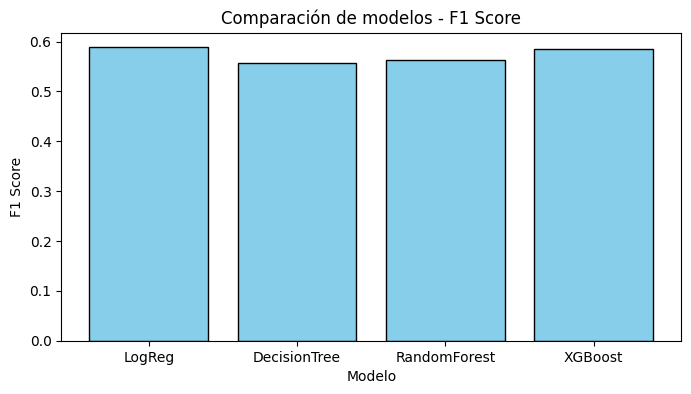

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from ft_engineering import load_data   


# Función: resumen de métricas
def summarize_classification(y_true, y_pred, y_prob=None):

    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
    }

    if y_prob is not None:
        metrics["roc_auc"] = roc_auc_score(y_true, y_prob)

    return metrics


# Función: entrenamiento + evaluación
def build_model(model_name, model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = None

    metrics = summarize_classification(y_test, y_pred, y_prob)
    metrics["model"] = model_name

    return model, metrics


# MAIN
if __name__ == "__main__":

    # cargar datos + features
    preprocessor, X_train, X_test, y_train, y_test = load_data()

    # Modelos a comparar
    models = {
        "LogReg": LogisticRegression(max_iter=1000),
        "DecisionTree": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(n_estimators=200),
        "XGBoost": XGBClassifier(
            eval_metric="logloss",
            learning_rate=0.1,
            max_depth=5,
            n_estimators=200,
            subsample=0.8
        ),
    }

    results = []
    trained_models = {}

    # Entrenar + evaluar
    for name, mdl in models.items():
        print(f"\n🔹 Entrenando: {name}")

        model, metrics = build_model(
            name,
            mdl,
            X_train,
            y_train,
            X_test,
            y_test
        )

        trained_models[name] = model
        results.append(metrics)

    # Tabla comparativa
    results_df = pd.DataFrame(results)
    print("\n Resultados comparativos:")
    print(results_df.sort_values(by="f1", ascending=False))

    # Mejor modelo
    best_model_name = results_df.sort_values(by="f1", ascending=False).iloc[0]["model"]
    best_model = trained_models[best_model_name]

    print(f"\n Mejor modelo: {best_model_name}")

    # Gráfico comparativo
    plt.figure(figsize=(8,4))
    plt.bar(results_df["model"], results_df["f1"], color="skyblue", edgecolor="black")
    plt.title("Comparación de modelos - F1 Score")
    plt.ylabel("F1 Score")
    plt.xlabel("Modelo")
    plt.show()


##### Análisis de Resultados – Comparación de Modelos Supervisados

A continuación se documenta la evaluación de los modelos entrenados para predecir la deserción de clientes (Churn). Se utilizaron las métricas: Accuracy, Precision, Recall, F1-Score y ROC-AUC para comparar su desempeño.

##### Resumen de Resultados

Los resultados indican que el modelo con mejor desempeño general según la métrica principal seleccionada (F1-Score) es Logistic Regression, seguido muy de cerca por XGBoost.
Aunque Random Forest presenta un leve mejor desempeño en precisión y exactitud, su capacidad para identificar clientes que abandonan (recall) es inferior, afectando su equilibrio general.
Decision Tree se comporta como línea base, con el rendimiento más bajo entre los modelos probados.

##### Logistic Regression (Mejor modelo)

Logistic Regression obtuvo el mejor puntaje F1 (0.588), acompañado del mayor ROC-AUC (0.840), lo que indica una buena capacidad para discriminar entre clientes que abandonan y los que permanecen.
Este modelo ofrece un balance adecuado entre precisión y recall, lo cual es clave en problemas de churn donde la identificación de clientes en riesgo es prioritaria.

Su simplicidad y estabilidad lo convierten en un candidato sólido para pasar a etapas posteriores del proyecto. Además, al ser un modelo interpretable, facilita la explicación de los factores que contribuyen al churn.

##### XGBoost

XGBoost obtuvo un rendimiento comparable al de Logistic Regression (F1 = 0.584; ROC-AUC = 0.831).
Este modelo demuestra capacidad para capturar relaciones no lineales entre las variables y el churn.
Aunque no superó a Logistic Regression, su cercanía sugiere que, con una etapa de optimización de hiperparámetros, podría ofrecer mejoras significativas.

Se considera un modelo competitivo y con potencial para iteraciones futuras, especialmente cuando se incorporen nuevas características.

##### Random Forest

Random Forest alcanzó un F1-Score de 0.564 y el valor de precisión más alto del conjunto de modelos evaluados.
Esto significa que, cuando predice churn, tiende a acertar con mayor frecuencia en comparación con los otros modelos.

Sin embargo, su recall es menor, lo cual implica que no identifica correctamente a una proporción importante de clientes que realmente abandonan.
Dado que en un problema de churn es más crítico identificar clientes en riesgo (recall), este comportamiento limita su utilidad como modelo principal.

##### Decision Tree

Decision Tree obtuvo el rendimiento más bajo en la mayoría de las métricas (F1 = 0.557; ROC-AUC = 0.697).
Su simplicidad y capacidad de interpretación lo convierten en una buena referencia como modelo base, pero su tendencia al sobreajuste reduce su capacidad de generalización.
No se recomienda como candidato principal.

##### Conclusión General

El análisis comparativo indica que Logistic Regression ofrece el mejor equilibrio entre sensibilidad, precisión y estabilidad, lo que la posiciona como el modelo más adecuado para continuar con las siguientes fases del proyecto.

XGBoost aparece como una alternativa competitiva, con potencial de mejora mediante tuning.
En cambio, aunque Random Forest presenta alta precisión, su bajo recall limita su utilidad en la detección efectiva de clientes que abandonan.
Finalmente, Decision Tree queda relegado como modelo base debido a su menor rendimiento global.